# Linear Regression

This section seeks to explore the linear relationships and statistical significance between different traffic variables.

## Speed ~ Weekday, Flow, Occupancy

$$
    speed_t = \beta_0 + \delta_1 \cdot weekday_t + \beta_1 \cdot flow_t + \beta_2 \cdot occ_t + u_t
$$
where $weekday$ is a dummy variable indicating whether there it is a weekday, and the variables are control variables.

Check one station, at one time first.

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/I88N-processed/concat/concat.csv")

In [3]:
data.head(3)

,Unnamed: 0,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,0,408907,2017-01-01 00:00:00,2.1,95.0,68.8,2017-01-01,00:00:00,0
1,1,408907,2017-01-01 00:05:00,2.0,91.0,68.4,2017-01-01,00:05:00,1
2,2,408907,2017-01-01 00:10:00,2.0,91.0,68.4,2017-01-01,00:10:00,2


In [4]:
station_ids = data['Station ID'].unique().tolist()

In [5]:
station_id = station_ids[0]
sample_data = data.loc[data['Station ID'] == station_id]
sample_data = sample_data.loc[(sample_data['Time'] == '08:30:00') | (sample_data['Time'] == '08:30')]

In [6]:
print(station_id)

408907


In [34]:
sample_data = sample_data.loc[(sample_data['Date'] >= '2017-06-01') & 
                              (sample_data['Date'] <= '2017-06-30') & 
                              (sample_data['Date'] != '2017-06-15')]

Construct the response variable and explanatory variables.

In [35]:
speed = sample_data['Speed'].values.tolist()
flow = sample_data['Flow'].values.tolist()
occ = sample_data['Occupancy'].values.tolist()

Label weekday and weekend.

In [36]:
dates = sample_data['Date'].values.tolist()

In [37]:
import datetime as dt

In [38]:
def date_to_day(date):
    # date: a date string in the format of "yyyy-mm-dd"
    # return: an int w/t Monday being 0 and Sunday being 6.
    if date.find('-') != -1:
        y, m, d = date.split('-')
    else:
        m, d, y = date.split('/')
    return dt.datetime(int(y), int(m), int(d)).weekday()

In [39]:
days = list(map(date_to_day, dates))
weekday = [0 if day >= 5 else 1 for day in days]

## Regression - Model Fitting

In [40]:
import statsmodels.api as sm

In [41]:
X = pd.DataFrame({
    'weekday': weekday,
    'flow': flow,
    'occ': occ
})
X = sm.add_constant(X)
Y = pd.DataFrame({
    'speed': speed
})

In [42]:
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     38.42
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           1.63e-09
Time:                        18:31:23   Log-Likelihood:                -71.199
No. Observations:                  29   AIC:                             150.4
Df Residuals:                      25   BIC:                             155.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.0843      2.294     28.376      0.0

## Visualization

In [43]:
import matplotlib.pyplot as plt

### Speed vs. Flow

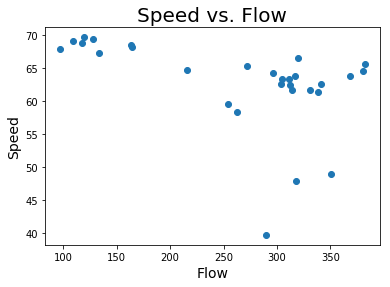

In [44]:
plt.scatter(X['flow'], Y['speed'])
plt.title('Speed vs. Flow', fontsize=20)
plt.xlabel('Flow', fontsize=14)
plt.ylabel('Speed', fontsize=14)
plt.show()

### Speed vs. Occupancy

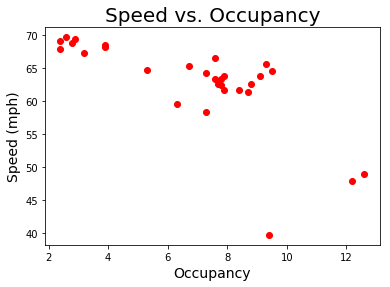

In [45]:
plt.scatter(X['occ'], Y['speed'], color='red')
plt.title('Speed vs. Occupancy', fontsize=20)
plt.xlabel('Occupancy', fontsize=14)
plt.ylabel('Speed (mph)', fontsize=14)
plt.show()

### Speed vs. Weekday

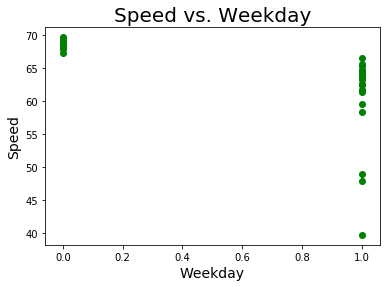

In [46]:
plt.scatter(X['weekday'], Y['speed'], color='green')
plt.title('Speed vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Speed', fontsize=14)
plt.show()

In [19]:
sum(X['weekday'] == 0), sum(X['weekday'] == 1)

(104, 249)

### Flow vs. Weekday

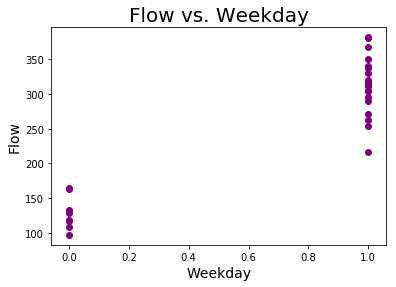

In [47]:
plt.scatter(X['weekday'], X['flow'], color='purple')
plt.title('Flow vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Flow', fontsize=14)
plt.show()

### Occupancy vs. Weekday

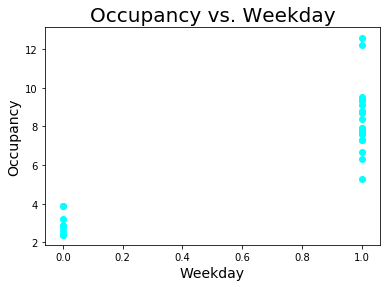

In [48]:
plt.scatter(X['weekday'], X['occ'], color='cyan')
plt.title('Occupancy vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Occupancy', fontsize=14)
plt.show()

### Histogram: Approximating Distribution

In [49]:
weekend_Y = Y.loc[X['weekday'] == 0]
weekend_speed = weekend_Y['speed'].values

In [50]:
weekday_Y = Y.loc[X['weekday'] == 1]
weekday_speed = weekday_Y['speed'].values

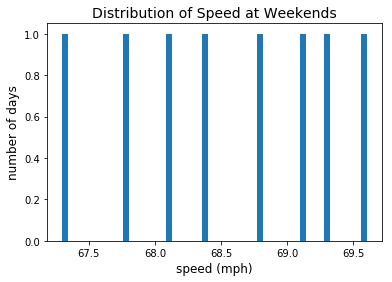

In [51]:
# plot histogram for weekends
plt.hist(weekend_speed, bins=50)
plt.title(r'Distribution of Speed at Weekends', fontsize=14)
plt.xlabel(r'speed (mph)', fontsize=12)
plt.ylabel(r'number of days', fontsize=12)
plt.show()

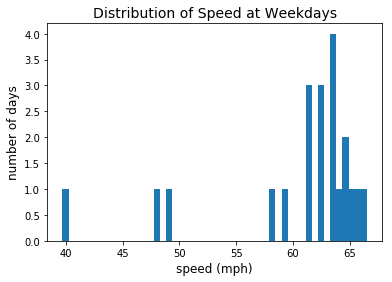

In [52]:
# plot histogram for weekdays
plt.hist(weekday_speed, bins=50)
plt.title(r'Distribution of Speed at Weekdays', fontsize=14)
plt.xlabel(r'speed (mph)', fontsize=12)
plt.ylabel(r'number of days', fontsize=12)
plt.show()

# Speed ~ Weekday

In [53]:
X_2 = X[['const', 'weekday']]

In [54]:
model_2 = sm.OLS(Y, X_2).fit()
summary_2 = model_2.summary()
print(summary_2)

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     10.91
Date:                Sat, 13 Apr 2019   Prob (F-statistic):            0.00270
Time:                        18:32:22   Log-Likelihood:                -91.287
No. Observations:                  29   AIC:                             186.6
Df Residuals:                      27   BIC:                             189.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.5500      2.065     33.204      0.0

In [55]:
X_2_pred = model_2.predict(X_2)

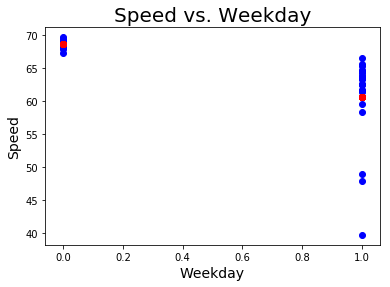

In [56]:
plt.scatter(X_2['weekday'], Y['speed'], color='blue')
plt.scatter(X_2['weekday'], X_2_pred.values, color='red')
plt.title('Speed vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Speed', fontsize=14)
plt.show()

$\textit{Remark}$.  The above regression is in fact equivalent to grouping and taking the means of each group.